<a href="https://colab.research.google.com/github/adi180397/ml-projects/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d architsharma01/loan-approval-prediction-dataset

  0% 0.00/80.6k [00:00<?, ?B/s]
100% 80.6k/80.6k [00:00<00:00, 47.6MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/loan-approval-prediction-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [7]:
df.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
df.shape

(4269, 13)

In [9]:
df.drop(columns=['loan_id'],inplace=True)

In [11]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [12]:
# Data cleaning


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


no null values


In [15]:
# no duplicated rows
df.duplicated().sum()

0

In [16]:
df[' loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name:  loan_status, dtype: int64

In [19]:
# checking imbalance data
approval_percentage = df[' loan_status'].value_counts()[0]/df.shape[0] * 100
approval_percentage

62.215975638322796

In [33]:
df[' education'] = df[' education'].str.strip()

In [34]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [36]:
df.replace({'Graduate':1,'Not Graduate	':0})

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [42]:
df.replace('Not Graduate',0,inplace = True)


In [45]:
df.replace('Graduate',1,inplace= True)

In [50]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [52]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [60]:
df[' self_employed'].replace({'Yes': 1,'No': 0},inplace = True)

In [61]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [64]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [66]:
df.replace({'Approved':1,'Rejected':0},inplace = True)

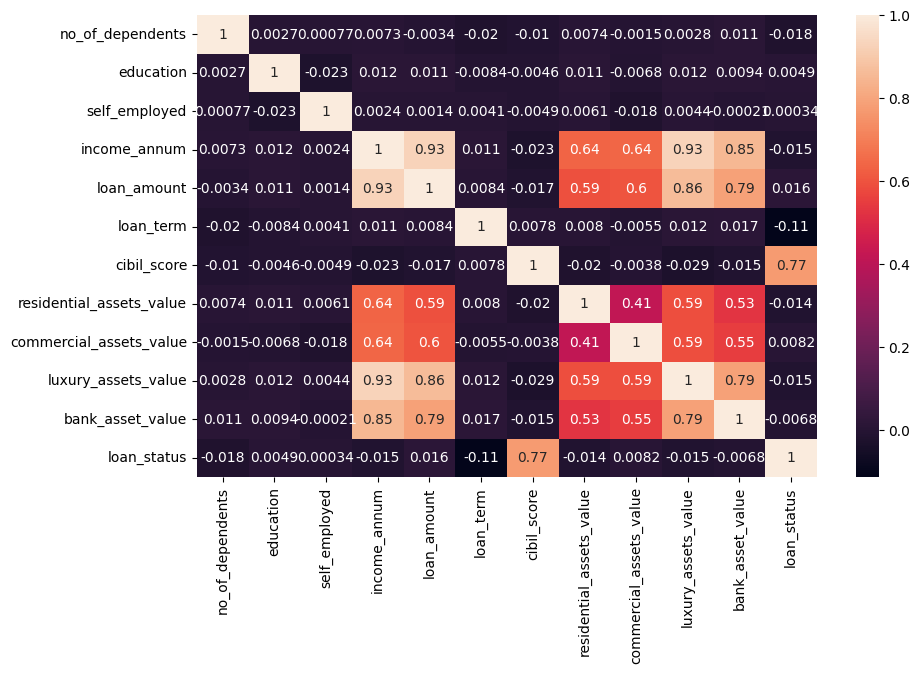

In [76]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)

plt.show()

In [84]:
temp_df1 = df.drop(columns=['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'])
temp_df2 = df.drop(columns=['income_annum','loan_amount'])
temp_df3 = df.drop(columns=['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value','income_annum'])

In [77]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

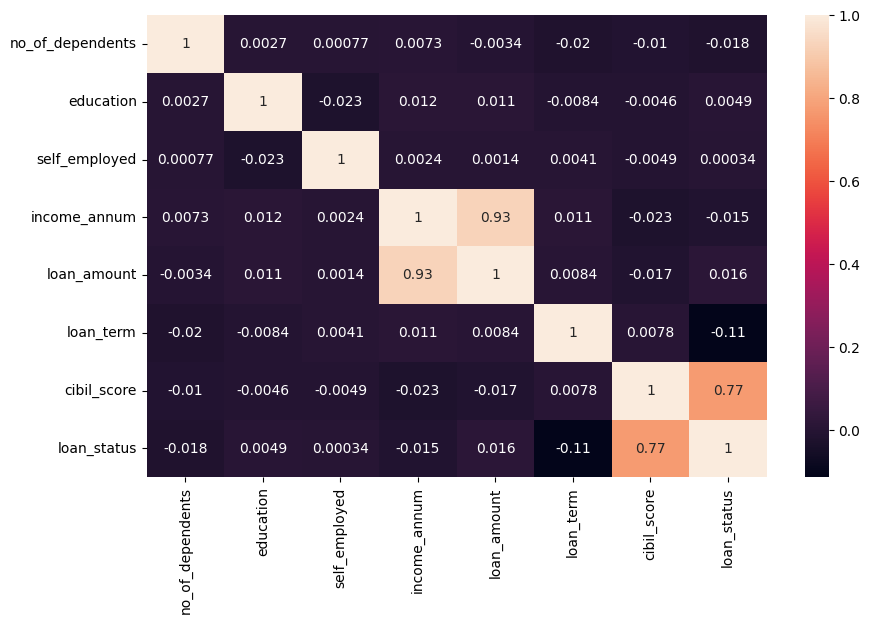

In [82]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(temp_df1.corr(),annot = True)

plt.show()

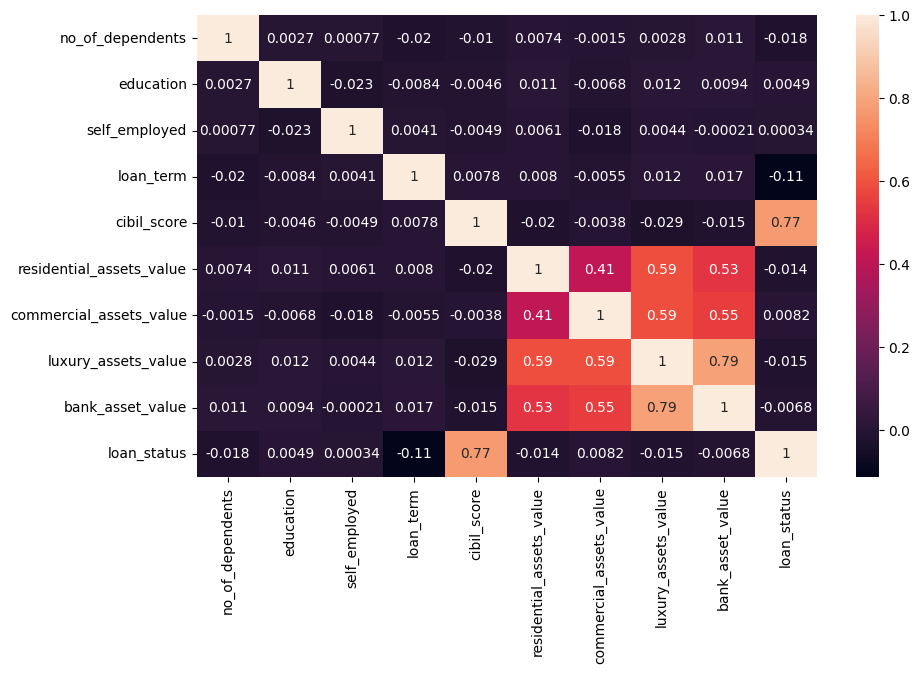

In [83]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(temp_df2.corr(),annot = True)

plt.show()

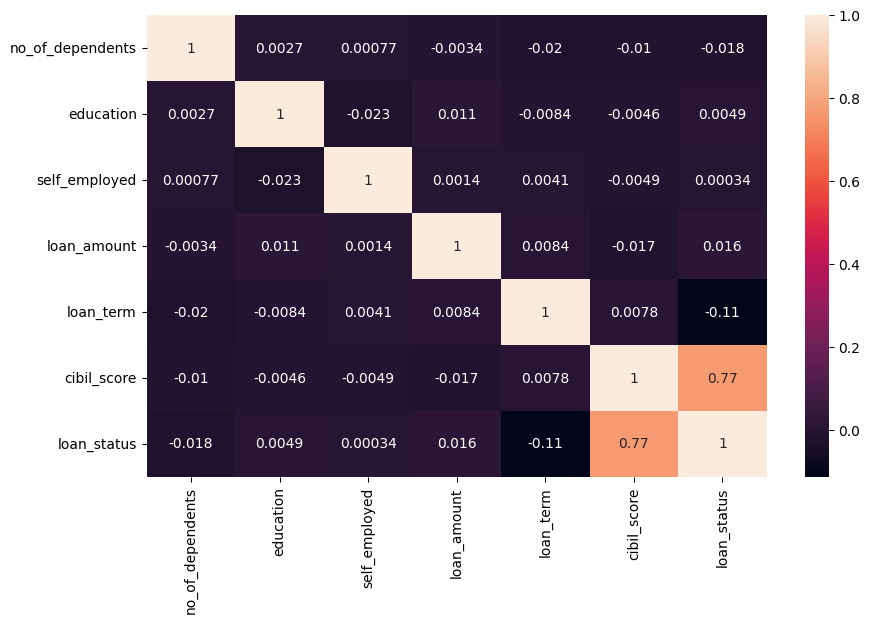

In [85]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(temp_df3.corr(),annot = True)

plt.show()

In [89]:
X = temp_df3.iloc[:,0:6]
y = temp_df3['loan_status']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [93]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [94]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)



In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [101]:
lrc = LogisticRegression(solver='liblinear', penalty='l2')

In [102]:
lrc.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [103]:
y_pred = lrc.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score

In [105]:
accuracy_score(y_test, y_pred)

0.9227166276346604

In [106]:
xgb = XGBClassifier(n_estimators=30,random_state=2)

In [107]:
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.9578454332552693

In [108]:
dtc = DecisionTreeClassifier(max_depth=5)

In [109]:
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9519906323185011